### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[108]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10
Los polos son:
[-3.+1.j -3.-1.j]


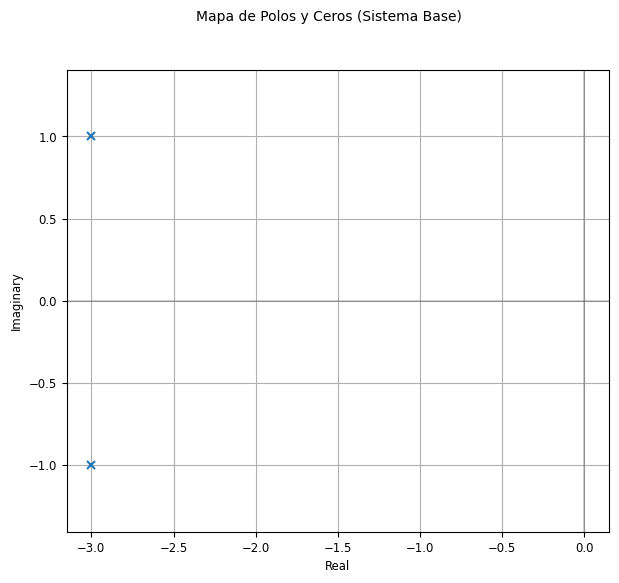

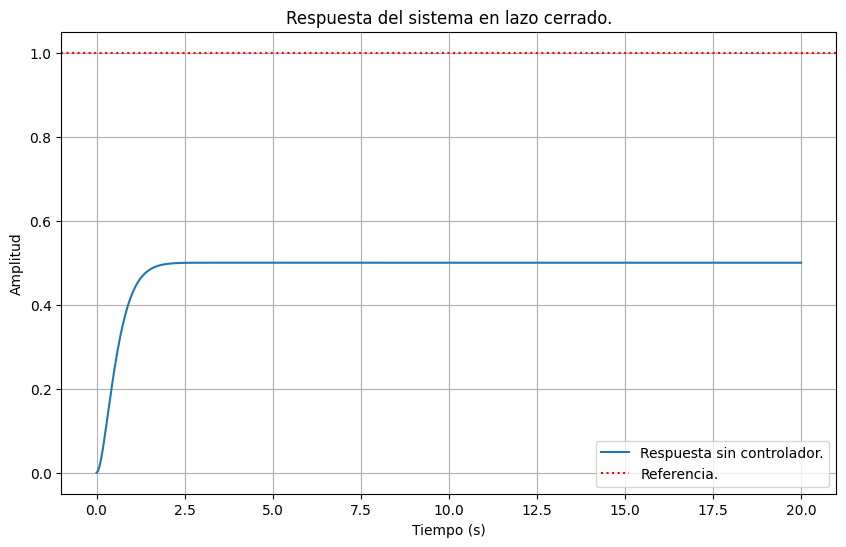

Métricas de desempeño del sistema base:
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s


In [16]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Definición de la planta Gp(s). 
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). 
sistema_base = ct.feedback(Gp, 1)
print("Función de Transferencia del sistema base (lazo cerrado):")
print(sistema_base)

polos = ct.poles(sistema_base)

print("Los polos son:")
print(polos)

# Mapa de Polos y Ceros 
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_base, title='Mapa de Polos y Ceros (Sistema Base)')
plt.grid(True)
plt.show()

# Simulación de la respuesta al escalón.
t = np.linspace(0, 20, 501)
t, y_base = ct.step_response(sistema_base, T=t)

# Grafica de la respuesta base
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# Métricas de desempeño
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_base)

valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")







---


#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

### Análisis de la sintonización de las ganancias del controlador PID

Las métricas obtenidas del sistema base fueron las siguientes: 
$$\text{Error en estado estacionario} = 0.5000 (> 0)$$
$$\text{Sobreimpulso} = 0\% $$
$$\text{Tiempo de establecimiento} = 1.67\,s \ (> 1\,s) $$

Al observar que el error en estado estacionario y el tiempo de establecimiento no cumplen con los criterios solicitados, y recordando el análisis que se hizo para la práctica P_2_03, se propusieron los siguientes valores de las ganancias para una primera prueba:

$K_p = 30$, $K_i = 8$, $K_d = 2$

Con estos valores, los resultados obtenidos fueron los siguientes:
$$\text{Error en estado estacionario} = 0.0001 (> 0)$$
$$\text{Sobreimpulso} = 10.07\% \ (> 5\%)$$
$$\text{Tiempo de establecimiento} = 0.79\,s \ (< 1\,s) $$

Como se puede observar, con los primeros valores elegidos solo se cumplió la condición de  
$T_s < 1\,s$,  
sin embargo el sobreimpulso y el error en estado estacionario fueron mayores al lo solicitado.  

Ahora, teniendo en cuenta que aumentar $K_p$ acelera la respuesta del sistema, pero también incrementa el sobreimpulso lo cual se compensa ajustando $K_i$ y $K_d$ y, en una segunda prueba, se mantuvo el valor de $K_p = 8$ y se aumentaron $K_i$ y $K_d$, quedando como:

$$K_i = 20 \text{ y } K_d = 5$$

Con estos valores, los resultados fueron:

$$\text{Error en estado estacionario} = 0.00 \ (= 0) $$
$$\text{Sobreimpulso} = 0.00\% \ (< 5\%) $$
$$\text{Tiempo de establecimiento} = 0.16\,s \ (< 1\,s) $$

cumpliendo las condiciones solicitadas.  

Se realizaron más pruebas eligiendo distintos valores, y se observó que al utilizar valores cada vez más grandes,se obtenía una respuesta cada vez más rápida y con un menor sobre impulso, mientras que el error en estado estacionario se mantiene en cero.  

Por ejemplo, con los valores $K_p = 120$, $K_i = 110$, $K_d = 20$, se obtuvo:

$$\text{Error en estado estacionario} = 0.0 $$
$$\text{Sobreimpulso} = 0.00\% $$
$$\text{Tiempo de establecimiento} = 0.04\,s $$


---


#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---


Función de Transferencia del sistema en lazo cerrado con PID:
<TransferFunction>: sys[304]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     100 s^2 + 600 s + 550
  ---------------------------
  s^3 + 106 s^2 + 605 s + 550


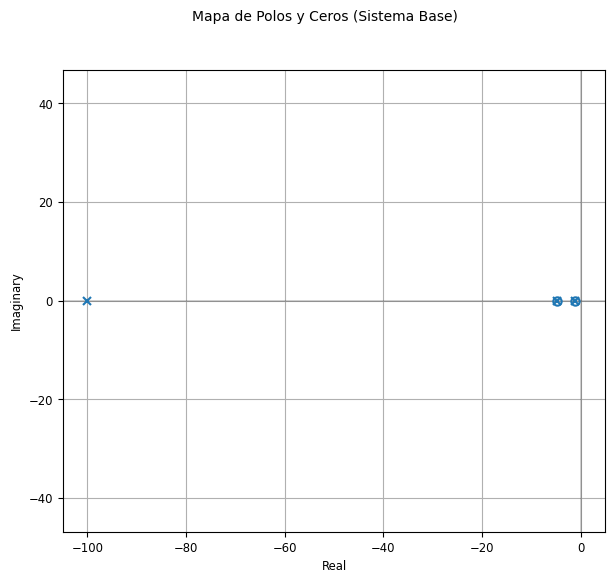

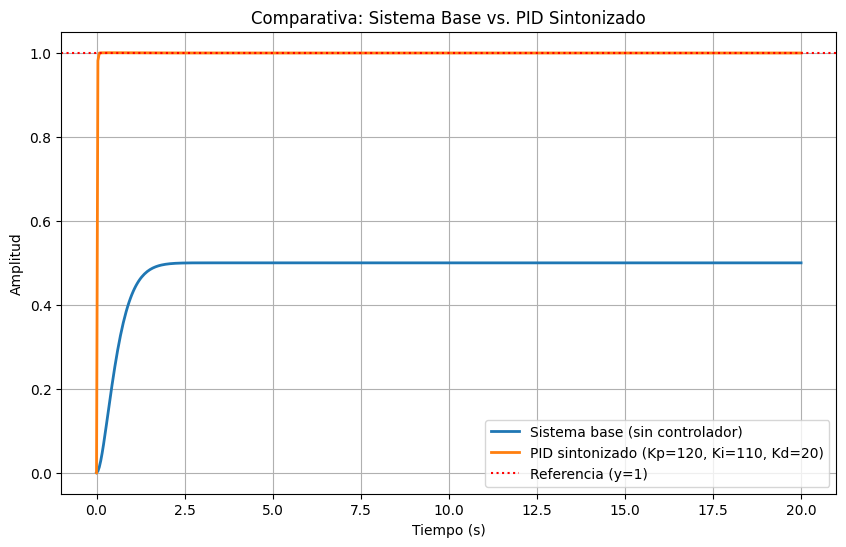

Métricas del sistema base:
  - Valor final: 0.5000
  - Error en estado estacionario: 0.5000
  - Sobreimpulso: 0.00%
  - Tiempo de establecimiento: 1.67 s

Métricas de desempeño del sistema con controlador PID:
  - Valor final: 0.5000
  - Error en estado estacionario: -0.0000
  - Sobreimpulso: 0.00%
  - Tiempo de establecimiento: 0.04 s


In [ ]:
# Valores de las ganancias
Kp = 120  # Ganancia proporcional
Ki = 110  # Ganancia integral
Kd = 20  # Ganancia derivativa

# Función de transferencia del PID: Gc(s) = (Kd s^2 + Kp s + Ki) / s
Gc_PID = ct.tf([Kd, Kp, Ki], [1, 0])

# Sistema en lazo cerrado con PID
sistema_PID = ct.feedback(Gc_PID * Gp, 1)
print("Función de Transferencia del sistema en lazo cerrado con PID:")
print(sistema_PID)

# Simulación de la respuesta al escalón
t, y_PID = ct.step_response(sistema_PID, T=t)

# Mapa de Polos y Ceros 
plt.figure(figsize=(7, 6))
ct.pzmap(sistema_PID, title='Mapa de Polos y Ceros (Sistema Controlado)')
plt.grid(True)
plt.show()

# --- Gráfica comparativa ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Sistema base (sin controlador)", linewidth=2)
plt.plot(t, y_PID, label=f"PID sintonizado (Kp={Kp}, Ki={Ki}, Kd={Kd})", linewidth=2)
plt.axhline(y=1, color="r", linestyle=":", label="Referencia (y=1)")
plt.title("Comparativa: Sistema Base vs. PID Sintonizado")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Métricas de desempeño ---
print("Métricas del sistema base:")
info_base = ct.step_info(sistema_base)
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario: {1 - y_base[-1]:.4f}")
print(f"  - Sobreimpulso: {info_base['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento: {info_base['SettlingTime']:.2f} s")

print("\nMétricas de desempeño del sistema con controlador PID:")
info_PID = ct.step_info(sistema_PID)
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario: {1 - y_PID[-1]:.4f}")  
print(f"  - Sobreimpulso: {info_PID['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento: {info_PID['SettlingTime']:.2f} s")

